In [27]:
import pandas as pd
import numpy as np

In [28]:
df = pd.read_csv('final_dataset.csv')

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
# CSV 파일을 읽어들입니다.
df = pd.read_csv('semi_dataset.csv')

# 특성과 레이블을 분리합니다.
X = df.drop('label', axis=1).values  # 특성 데이터
y = df['label'].values  # 레이블 데이터


# 훈련 세트와 나머지(검증+테스트) 세트로 분할합니다. (80% : 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train = scaler.fit_transform(X_train)
X_temp = scaler.transform(X_temp)

# X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
# X_temp = X_temp.reshape((X_temp.shape[0], 1, X_temp.shape[1]))

# 나머지 데이터를 검증 세트와 테스트 세트로 분할합니다. (50% : 50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# 분할된 데이터 세트의 크기를 출력합니다.
print(f"Train set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# 분할된 데이터 세트의 레이블 분포를 출력합니다.
print(f"Train set label distribution: {np.bincount(y_train.astype(int))}")
print(f"Validation set label distribution: {np.bincount(y_val.astype(int))}")
print(f"Test set label distribution: {np.bincount(y_test.astype(int))}")

Train set: 1365 samples
Validation set: 171 samples
Test set: 171 samples
Train set label distribution: [855 510]
Validation set label distribution: [107  64]
Test set label distribution: [107  64]


In [32]:
X_train.shape

(1365, 248)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
from pycaret.classification import *

In [34]:
# # PyCaret 설정
# # train_size를 0.8로 설정하여 학습 데이터와 테스트 데이터를 80:20으로 분할
# exp_clf = setup(data = df, target = 'label', session_id=123, train_size=0.8)

# # 모든 분류 모델을 AUC 기준으로 비교
# best_model = compare_models(sort = 'Accuracy')

# # 가장 성능이 좋은 모델을 출력합니다.
# print(best_model)

In [35]:
# PyCaret 설정
exp_clf = setup(data = df, target = 'label', session_id=123)

# RandomForest 모델 생성
et_model = create_model('et', fold = 5)

# 모델 학습
et_tuned = tune_model(et_model, optimize = 'Accuracy')

# 검증 세트를 이용한 예측
predictions = predict_model(et_tuned)

# 모델의 성능 평가
evaluate_model(et_tuned)

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Original data shape,"(1707, 249)"
4,Transformed data shape,"(1707, 249)"
5,Transformed train set shape,"(1194, 249)"
6,Transformed test set shape,"(513, 249)"
7,Numeric features,248
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6820,0.7628,0.3333,0.6522,0.4412,0.2502,0.2777
1,0.6736,0.6516,0.3146,0.6222,0.4179,0.2238,0.2489
2,0.6527,0.7091,0.4045,0.5455,0.4645,0.2158,0.2211
3,0.6611,0.6631,0.3596,0.5714,0.4414,0.2158,0.2278
4,0.6765,0.7032,0.3933,0.6034,0.4762,0.2569,0.2692
Mean,0.6692,0.6980,0.3610,0.5989,0.4482,0.2325,0.2489
Std,0.0107,0.0393,0.0342,0.0375,0.0203,0.0176,0.0222


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6250,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6250,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.6250,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.6250,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6218,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.6218,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.6303,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.6303,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.6303,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6920,0.7118,0.3854,0.6491,0.4837,0.2840,0.3036


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Accuracy: 0.6842

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       107
           1       0.60      0.47      0.53        64

    accuracy                           0.68       171
   macro avg       0.66      0.64      0.64       171
weighted avg       0.67      0.68      0.67       171



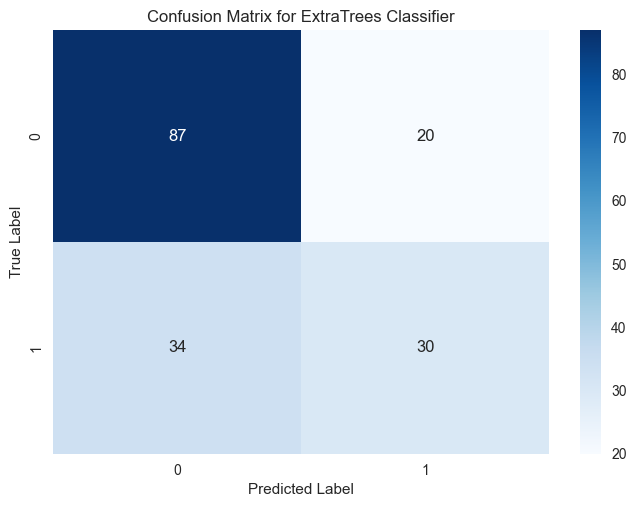

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ExtraTreesClassifier 모델 구성
et_classifier = ExtraTreesClassifier(n_estimators=100, random_state=123)

# 모델 학습
et_classifier.fit(X_train, y_train)

# 검증 세트를 이용해 예측을 수행합니다.
y_pred = et_classifier.predict(X_val)

# 정확도를 계산하고 출력합니다.
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 분류 리포트를 생성하고 출력합니다.
class_report = classification_report(y_val, y_pred)
print("\nClassification Report:")
print(class_report)

# 혼동 행렬을 생성하고 시각화합니다.
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for ExtraTrees Classifier')
plt.show()

In [37]:
# 훈련 세트에 대한 예측을 수행합니다.
y_train_pred = et_classifier.predict(X_train)

# 훈련 세트의 정확도를 계산하고 출력합니다.
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# 검증 세트를 이용해 예측을 수행합니다.
y_pred = et_classifier.predict(X_val)

# 검증 세트의 정확도를 계산하고 출력합니다.
val_accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# 과적합 확인
if train_accuracy > val_accuracy:
    print('The model is overfitting.')
else:
    print('The model is not overfitting.')

Training Accuracy: 0.9993
Validation Accuracy: 0.6842
The model is overfitting.


### **PyAudio Setup**

In [38]:
import pyaudio

In [39]:
FORMAT = pyaudio.paInt16
CHANNELS = 1
SAMPLE_RATE = 16000
CHUNK = int(SAMPLE_RATE / 10)

audio = pyaudio.PyAudio()

In [40]:
def int2float(sound):
    abs_max = np.abs(sound).max()
    sound = sound.astype('float32')
    if abs_max > 0:
        sound *= 1/32768
    sound = sound.squeeze()  # depends on the use case
    return sound

In [41]:
import librosa

continue_recording = True

# def stop():
#     input("Press Enter to stop the recording:")
#     global continue_recording
#     continue_recording = False

def start_recording():

    stream = audio.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=SAMPLE_RATE,
                    input=True,
                    frames_per_buffer=CHUNK)

    data = []
    
    global continue_recording
    continue_recording = True

    while continue_recording:
    
        audio_chunk = stream.read(CHUNK)
        data.append(audio_chunk)

        audio_int16 = np.frombuffer(audio_chunk, np.int16)
        audio_float32 = int2float(audio_int16)

        # Convert the audio to a suitable format for YAMnet
        waveform = np.frombuffer(audio_chunk, dtype=np.int16) / 32768.0
        waveform = waveform.astype(np.float32)
        
        # Extract Log Mel Spectrogram features
        spectrogram_features_list = []
        predictions = []

        n_fft_value = min(2048, len(waveform))

        spectrogram_features = librosa.feature.melspectrogram(y=waveform, sr=SAMPLE_RATE, n_fft=n_fft_value, n_mels=248)
        spectrogram_features = librosa.power_to_db(spectrogram_features, ref=np.max)
        spectrogram_features_list.append(spectrogram_features)
        spectrogram_aggregated = np.mean(spectrogram_features, axis=1).reshape(1, -1) 

        # Ensure the feature count is correct
        if spectrogram_aggregated.shape[1] != scaler.n_features_in_:
            raise ValueError(f"Incorrect number of features. Expected {scaler.n_features_in_}, got {spectrogram_aggregated.shape[1]}")

        # Scale features
        spectrogram_scaled = scaler.transform(spectrogram_aggregated)

        # Inside your loop, after SVC prediction
        fall_detection_prediction = et_classifier.predict(spectrogram_scaled)
        predictions.append(fall_detection_prediction)

        if fall_detection_prediction == 1:
            print("Fall Detected")
            break

In [42]:
start_recording()

KeyboardInterrupt: 